In [1]:
import pandas as pd
import numpy as np
import glob
import os.path
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [3]:
list_of_files=glob.glob('../dell_us_/tmp/*_.txt')
columns=['webpageID','og:type','salestype','country','language',]

df=pd.DataFrame(columns=columns,index=range(len(list_of_files)))

dfword=pd.DataFrame(columns=['webpageID','labels'],index=range(len(list_of_files)))

for i in range(len(list_of_files)):
    dfword.loc[i,'webpageID']=df.loc[i,'webpageID']=os.path.basename(list_of_files[i])[:7]
    word=open(list_of_files[i],'r').read().strip('\n')
    dfword.loc[i,'word']=word
    
    headerfile=list_of_files[i].split('.txt')[0]+'header.txt'
    try:
        f=pd.read_csv(headerfile,header=None,)
    except ValueError:
        continue
    listf=[f.loc[x,0].lower().split(' ') for x in range(f.shape[0])]
    dicf={}
    #for j in listf:
     #   dicf[j[0]]=j[1]
    for j in listf:
        try:
            df.loc[i,j[0]]=j[1]
        except IndexError:
            continue

    
df.head()

,webpageID,og:type,salestype,country,language,categorypath,tooltip,ui-tabs-panel
0,000003_,category,parent_product_category,us,en,all-products,NaN,NaN
1,000004_,category,product_category,us,en,desktops,NaN,NaN
2,000005_,document,NaN,NaN,en,NaN,NaN,NaN
3,000006_,category,product_category,us,en,laptops,NaN,NaN
4,000007_,category,product_category,us,en,enterprise-products,NaN,NaN


['all-products' 'cloud-client-computing' 'deals' 'dell-tablets' 'desktops'
 'document_' 'enterprise-products' 'laptops' 'other-product'
 'server-storage-solutions' 'software' 'unkowntype_']
number of labels is 12


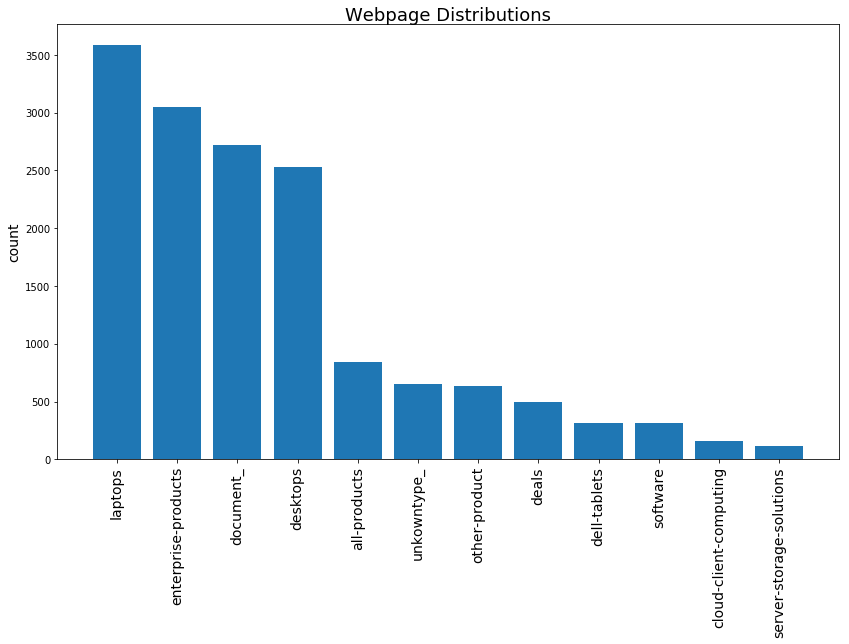

In [4]:
df=df.fillna(' ')
#df.loc[:,'og:type_cpath']=['_'.join((i,j))for i, j in zip(df.loc[:,'og:type'],df.loc[:,'categorypath'])]

#uniquelablef=df.loc[:,'og:type_cpath'].unique()
df.loc[df.loc[:,'og:type']=='document','categorypath']='document_'
df.loc[df.loc[:,'og:type']=='documentsearch','categorypath']='document_'
df.loc[df.loc[:,'og:type']==' ','categorypath']='unkowntype_'
#uniquelablef=df.loc[:,'categorypath'].unique()
for i in range(df.shape[0]):
    if df.loc[i,'categorypath'] not in {'document_','laptops','desktops',
                                        'enterprise-products','unkowntype_','deals','software','dell-tablets',
                                     'server-storage-solutions','cloud-client-computing','all-products'}:
           df.loc[i,'categorypath']='other-product'
    


#print(uniquelablef)
#print('number of labels is {}'.format(len(uniquelablef)))
fig=plt.figure(figsize=(14,8))
labels,labelscount = np.unique(df.loc[:,'categorypath'].values,return_counts=True)
print(labels)
print('number of labels is {}'.format(len(labels)))
indices=np.argsort(labelscount)[::-1]
plt.bar(range(len(labels)),labelscount[indices],align='center')
plt.xticks(range(len(labels)),labels[indices],rotation=90, fontsize=14)
plt.title('Webpage Distributions', fontsize=18)
plt.ylabel('count', fontsize=14)
plt.show()

#for i in range(len(uniquelablef)):
    #df.loc[df.loc[:,'og:type_cpath']==uniquelablef[i],'label']=i
    #df.loc[df.loc[:,'categorypath']==uniquelablef[i],'label'] = int(i)

#df

In [5]:
dfword=dfword.fillna(' ')
dfword.loc[:,'labels']=df.loc[:,'categorypath']
allwords=dfword.loc[:,'word']
dfword.head()

,webpageID,labels,word
0,000003_,all-products,dell o sign in click to chat or call us shop ...
1,000004_,desktops,for hours only get tremendous savings up to o...
2,000005_,document_,alternate sign in click to chat or call us lo...
3,000006_,laptops,for hours only get tremendous savings up to o...
4,000007_,enterprise-products,dell o sign in click to chat or call us shop ...


In [6]:


stops=stopwords.words("english")
stops.append('dell')

porter= PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

vectorizer = TfidfVectorizer(analyzer='word',stop_words=stops,use_idf=False,
                             tokenizer=None, norm=None, max_features= 200)




In [7]:
words_features = vectorizer.fit_transform(allwords)
words_features = words_features.toarray().astype(int)

key_words = vectorizer.get_feature_names()


In [8]:
dfword=dfword.drop('word',axis=1)
dfword=dfword.join(pd.DataFrame(data=words_features,columns=key_words))
dfword.head()


,webpageID,labels,ac,access,accessories,add,advantage,apply,atom,au,...,von,votre,vous,vpro,windows,wireless,xeon,xps,zu,zur
0,000003_,all-products,0,0,3,0,5,1,2,0,...,0,0,0,2,2,0,3,2,0,0
1,000004_,desktops,0,2,0,0,5,7,2,0,...,0,0,0,4,9,0,5,17,0,0
2,000005_,document_,0,6,0,0,6,1,2,0,...,0,0,0,2,0,0,3,0,0,0
3,000006_,laptops,0,0,0,0,5,7,2,0,...,0,0,0,2,6,0,4,23,0,0
4,000007_,enterprise-products,0,0,0,0,5,1,2,0,...,0,0,0,2,0,0,4,0,0,0


In [9]:
dfword.shape

(15399, 202)

In [10]:
df.to_csv('featuretable.csv', index=False)
dfword.to_csv('bagofwords.csv', index=False)
#newdf=pd.read_csv('featuretable.csv')
#newdf.head()

In [ ]:
#df.to_csv('featuretable.txt', index=False)

#newdf=pd.read_csv('featuretable.txt')
#newdf.head()

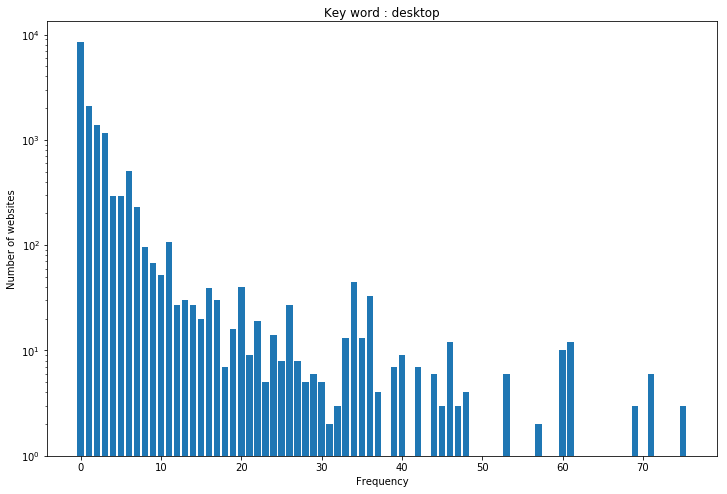

In [11]:
wordfrequency,infilerequency=np.unique(dfword.loc[:,'desktop'].values,return_counts=True)
plt.figure(figsize=(12,8))
plt.bar(wordfrequency,infilerequency,align='center')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Number of websites')
plt.title('Key word : desktop')
#plt.xlim(0,20)

In [12]:
def plot_cumulative_distribution(dataframe, keyword):
    wordfrequency,infilerequency=np.unique(dataframe.loc[:,keyword].values,return_counts=True)
    fig=plt.figure(figsize=(12,8))
    plt.bar(wordfrequency,infilerequency,align='center')
    plt.yscale('log')
    plt.xlabel('Frequency')
    plt.ylabel('Number of websites')
    plt.title('Key word : {}'.format(keyword))
    plt.show()
    fig.savefig('hendrik/highfrq/{}.png'.format(keyword))

In [13]:
words_count=np.sum(dfword.iloc[:,2:],axis=0)
indices_wc=np.argsort(words_count)[::-1]
#for i in indices_wc[:20]:
#   plot_cumulative_distribution(dfword,dfword.columns[2:][i])
    


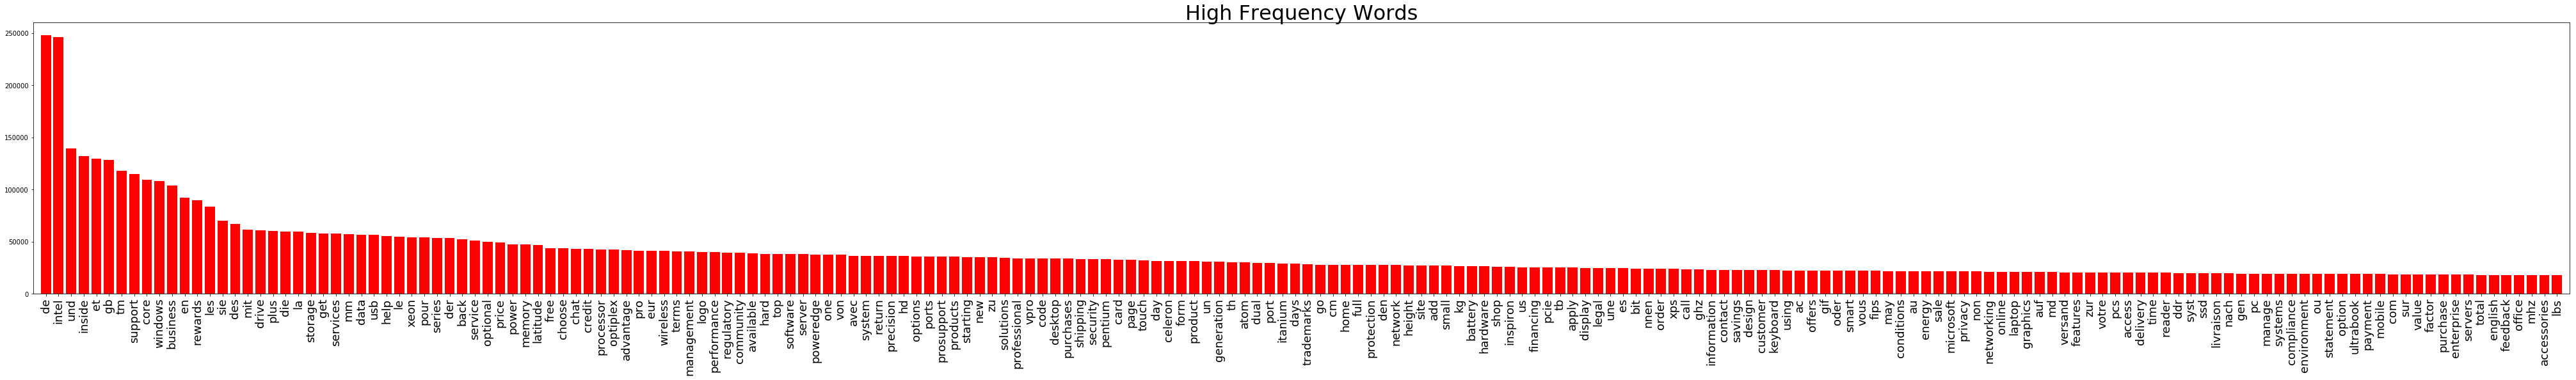

In [18]:
fig=plt.figure(figsize=(56,8))
plt.bar(range(len(words_count)),words_count[indices_wc],color='red',align='center')
plt.xticks(range(len(words_count)),np.array(dfword.columns[2:])[indices_wc],rotation=90,fontsize=18)
plt.tight_layout()
plt.xlim(-1,200)
plt.title('High Frequency Words', fontsize=32)
plt.show()

In [ ]:
##calculate median and mean of the words count

In [29]:
words_median = np.median(dfword.iloc[:,2:],axis=0).astype(float)
#words_median[words_median==0]=0.01

words_mean = np.mean(dfword.iloc[:,2:],axis=0)
median_over_mean = words_median/words_mean
print(words_median)
print(words_mean)
print(median_over_mean)

[  0.   0.   0.   0.   0.   1.   2.   0.   0.   2.   0.   0.   0.   0.   3.
   2.   0.   2.   3.   0.   0.   1.   1.   3.   0.   1.   1.   3.   0.   1.
   1.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   1.   0.   0.   0.   0.   0.   0.   1.   0.
   1.   9.   0.  10.   2.   0.   0.   0.   0.   0.   0.   0.   2.   0.   0.
   2.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
   0.   0.   0.   0.   0.   2.   1.   0.   0.   0.   0.   0.   0.   1.   2.
   0.   0.   0.   2.   0.   1.   0.   0.   0.   1.   0.   0.   1.   2.   0.
   0.   1.   2.   0.   0.   0.   1.   1.   0.   1.   0.   0.   2.   0.   0.
   0.   0.   0.   1.   2.   1.   1.   0.   1.   0.   0.   1.   1.   0.   0.
   2.   0.   5.   0.   0.   1.   0.   0.   3.   0.   0.   2.   0.   0.   0.
   3.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   2.   1.
   0.   3.  

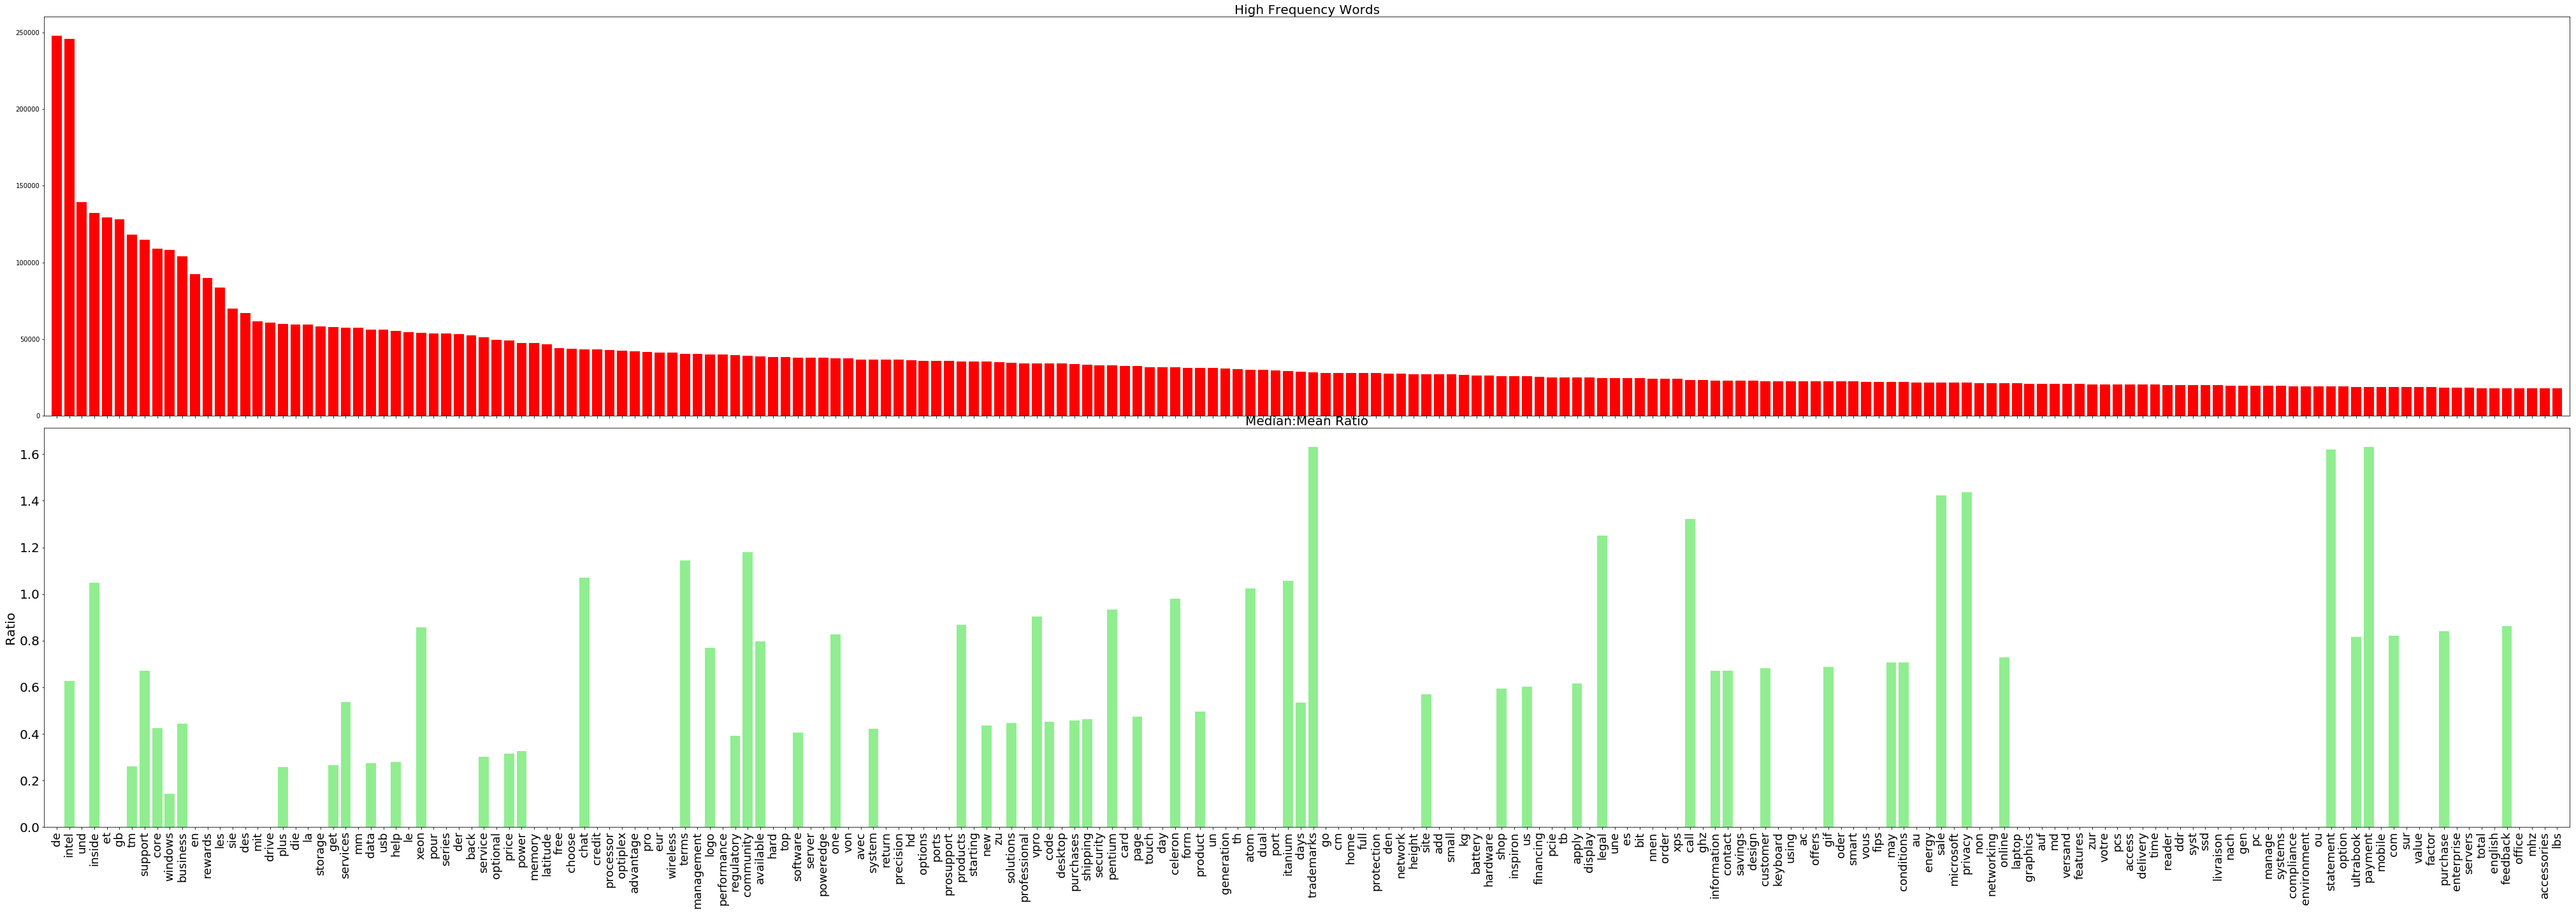

In [40]:
fig,axes=plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(56,20))
axes[1].bar(range(len(words_count)),median_over_mean[indices_wc],color='lightgreen',align='center')
axes[0].bar(range(len(words_count)),words_count[indices_wc],color='red',align='center')
axes[0].set_title('High Frequency Words', fontsize=20)
plt.xticks(range(len(words_count)),np.array(dfword.columns[2:])[indices_wc],rotation=90,fontsize=18)
plt.tight_layout()
plt.xlim(-1,200)
axes[1].set_title('Median:Mean Ratio', fontsize=20)
axes[1].set_ylabel('Ratio',fontsize=20)
plt.yticks(fontsize=20)
plt.show()